### Selecciona un dataset del [repositorio de la UCI](http://archive.ics.uci.edu/ml/), define una tarea de clasificación binaria y realiza el mismo proceso que en las Notas correspondientes.

### Prueba varias estructuras de redes y compara el desempeño en TEST con alguno de los métodos usados en las Notas 02B 

In [1]:
!sudo /opt/anaconda/bin/pip install neurolab

You are using pip version 6.0.8, however version 7.1.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = np.loadtxt("data/ionosphere.data", delimiter=",",dtype = 'string' )
for i in range (len(data[:,34])):
    data[i,34] = 1 if  (data[i,34] == 'g') else 0;
data = data.astype(np.float)
c = data[:,34]
d = data[:,:34]


0 = 'b' = bad no muestra ningun tipo de estructura en la ionosfera 

1 = 'g' = good muestra algun tipo  de estructura en la ionosfera

In [4]:
### Definimos y entrenamos una red con dos capas intermedias y una neurona de salida

In [5]:
from sklearn import cross_validation
import neurolab as nl

limits = np.vstack((np.min(d)*np.ones(d.shape[1]), np.max(d)*np.ones(d.shape[1]))).T
test_size = 0.9

d_train, d_test, c_train, c_test = cross_validation.train_test_split(d, 
                                                                     c, 
                                                                     test_size=test_size, 
                                                                     random_state=np.random.randint(1,100))

net = nl.net.newff(limits,[34, 10, 5, 1])
err = net.train(d_train, c_train.reshape(len(c_train), 1), show=5, epochs=100)

Epoch: 5; Error: 2.00258822038;
Epoch: 10; Error: 0.0616527639759;
The goal of learning is reached


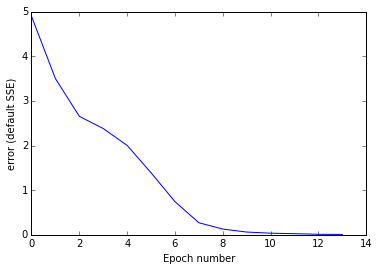

In [6]:
plt.plot(err)
plt.xlabel('Epoch number')
plt.ylabel('error (default SSE)')

###miramos el desempeño en el dataset de TEST

In [125]:
from sklearn.metrics import confusion_matrix

pred =  net.sim(d_test)[:,0]
pred[pred<0]=0
pred[pred>0]=1

cm = confusion_matrix(c_test, pred)
print cm
print np.sum(np.diag(cm))*1./np.sum(cm)

[[ 34  43]
 [  0 134]]
0.796208530806


###miramos el desempeño en el dataset de TRAIN

In [126]:
pred =  net.sim(d_train)[:,0]
pred[pred<0]=0
pred[pred>0]=1

cm = confusion_matrix(c_train, pred)
print cm
print np.sum(np.diag(cm))*1./np.sum(cm)

[[27 22]
 [ 0 91]]
0.842857142857


## prueva con  GaussianNB

In [127]:
from sklearn.naive_bayes import GaussianNB
from sklearn import cross_validation
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
g = GaussianNB()
g.fit(d_train, c_train)
print "acierto en train", g.score(d_train, c_train)
print "acierto en test ", g.score(d_test, c_test)

predicciones_train = g.predict(d_train)
predicciones_test  = g.predict(d_test)

cm_train=confusion_matrix(c_train, predicciones_train)
cm_test = confusion_matrix(c_test, predicciones_test)
print "matrix de confusión en train\n", cm_train
print "matrix de confusión en test\n", cm_test
print "verifica número de imágenes en total por columna"
print np.sum(cm_train+cm_test, axis=1)

acierto en train 0.871428571429
acierto en test  0.881516587678
matrix de confusión en train
[[33 16]
 [ 2 89]]
matrix de confusión en test
[[ 55  22]
 [  3 131]]
verifica número de imágenes en total por columna
[126 225]


# en este caso al parecer es mejor con GaussianNB